# **🧾 GST Fraud Detection using Machine Learning**

---



This project aims to build a machine learning model that can detect fraudulent GST transactions.
We use a synthetic dataset (gst_fraud_dataset.csv) containing both normal and fraudulent cases.

The project workflow covers:

Data Cleaning & Preprocessing

Exploratory Data Analysis (EDA)

Model Training & Evaluation

Feature Importance Analysis

Testing with Custom Inputs

Developing a Simple UI for Predictions

# **📂 Dataset**

---



We use a synthetic dataset gst_fraud_dataset.csv, which includes various financial and compliance-related attributes such as Invoice Value, Turnover, Input Tax Credit, Filing Delays, etc.

The dataset is labeled with a binary target variable Fraudulent:

0 → Normal Transaction ✅

1 → Fraudulent Transaction 🚨

# **🧹 Data Cleaning**

---



Data preprocessing ensures that missing and inconsistent values are handled properly.

Step 1: Checked for missing values.

Step 2: Filled all missing values using the Median Imputation technique (robust to outliers).

In [220]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/gst_fraud_dataset (2).csv")

# Show first 5 rows
print(df.head())

# Show feature names (column names)
print("\nFeatures:", list(df.columns[:-1]))  # all columns except 'Fraudulent'

# Show dataset description (basic stats)
print("\nDescription:\n", df.describe())
print("\nDataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())


   InvoiceValue      IGST      CGST      SGST  InputTaxCredit  Turnover  \
0        122458  30781.97  15852.23   7939.82         6913.97   2449160   
1        147367  13564.49  19597.51   9675.42        21605.87  28736565   
2        132432  15102.69   7867.46  16665.58         6014.69  31783680   
3        366338  29236.76  22561.75  27691.04        12362.02  54950700   
4        259678  53365.10  26001.72  29686.97        67523.34  29862970   

   InvoiceCount  BusinessAge  FilingDelay  Fraudulent  
0             5           24           76           1  
1           178           21           59           0  
2            56            6           85           1  
3           191           20           39           0  
4            57           18           14           1  

Features: ['InvoiceValue', 'IGST', 'CGST', 'SGST', 'InputTaxCredit', 'Turnover', 'InvoiceCount', 'BusinessAge', 'FilingDelay']

Description:
         InvoiceValue           IGST         CGST          SGST  \
coun

# **🎯 Importing Required Libraries**

---



We import essential Python libraries for:

Data Handling & Cleaning: pandas, numpy

Visualization: matplotlib, seaborn

Modeling: scikit-learn (for ML algorithms, scaling, evaluation metrics)

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [222]:
# Fill missing values with median for all numeric columns
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())

print("Missing values after imputation:\n", df.isnull().sum())


Missing values after imputation:
 InvoiceValue      0
IGST              0
CGST              0
SGST              0
InputTaxCredit    0
Turnover          0
InvoiceCount      0
BusinessAge       0
FilingDelay       0
Fraudulent        0
dtype: int64


# **📊 Exploratory Data Analysis (EDA)**

---



EDA is performed to gain insights into the dataset:

Checked distribution of Fraudulent vs Non-Fraudulent cases.

Analyzed correlations between numerical features.

Visualized data patterns using bar charts, histograms, and heatmaps.

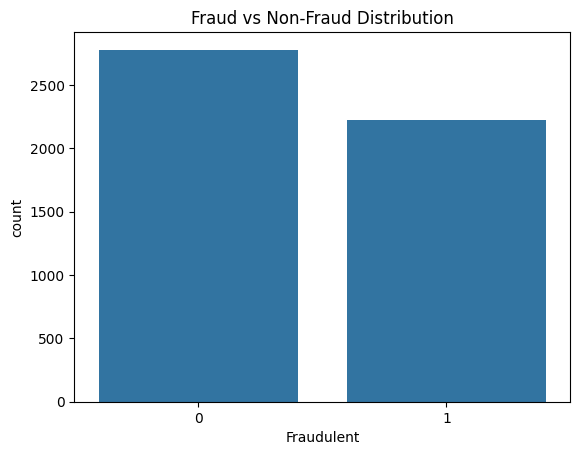

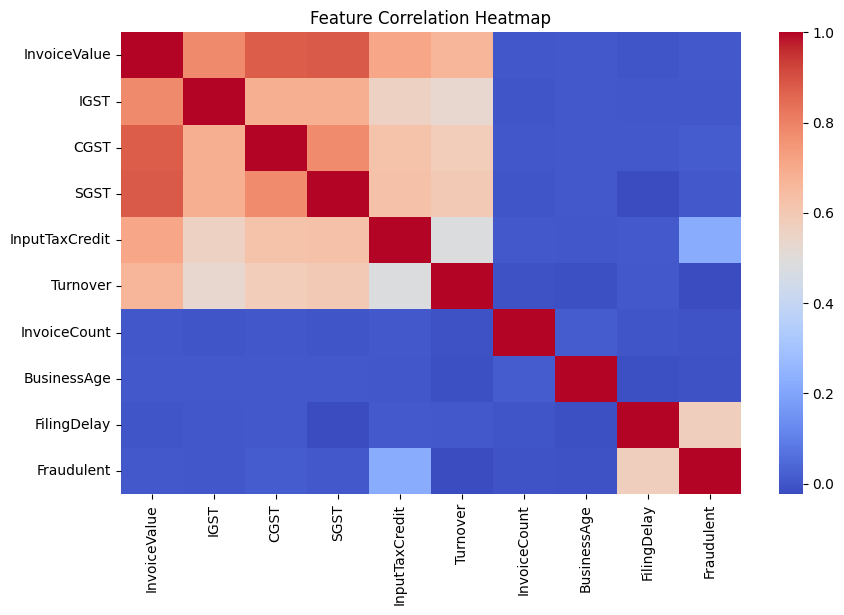

In [223]:
# Fraud vs Non-Fraud distribution
sns.countplot(x="Fraudulent", data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()



# **🔎 Feature & Target Creation**

---



Features (X): All independent columns (e.g., Invoice Value, Turnover, Filing Delay, etc.).

Target (y): Fraudulent column (binary outcome).

In [224]:
# Features (X) and target (y)
X = df.drop("Fraudulent", axis=1)
y = df["Fraudulent"]

print("Features:", X.columns.tolist())
print("\nTarget variable distribution:\n", y.value_counts())


Features: ['InvoiceValue', 'IGST', 'CGST', 'SGST', 'InputTaxCredit', 'Turnover', 'InvoiceCount', 'BusinessAge', 'FilingDelay']

Target variable distribution:
 Fraudulent
0    2777
1    2223
Name: count, dtype: int64


# **✂️ Train-Test Split**

---



The dataset is divided into:

Training Set (80%) → Used to train the model.

Testing Set (20%) → Used to evaluate model performance.

This ensures unbiased model evaluation.

In [225]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (4000, 9)
Testing set size: (1000, 9)


# **⚖️ Data Scaling**

---



Features are scaled using StandardScaler, ensuring that all features contribute equally to the model and eliminating bias from large numerical ranges.

In [226]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **🤖 Choosing the ML Algorithm**

---



We selected Random Forest Classifier due to:

Strong performance on tabular financial datasets

Ability to handle imbalanced classes using class_weight

Interpretability via feature importance scores

In [227]:
model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
model.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

# **📌 Model Evaluation**

---



We evaluate the trained model using:

Confusion Matrix → To visualize correct vs incorrect predictions.

Classification Report → Precision, Recall, F1-Score.

Accuracy Score → Overall model correctness.

Accuracy: 0.935

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       555
           1       0.89      0.98      0.93       445

    accuracy                           0.94      1000
   macro avg       0.93      0.94      0.93      1000
weighted avg       0.94      0.94      0.94      1000



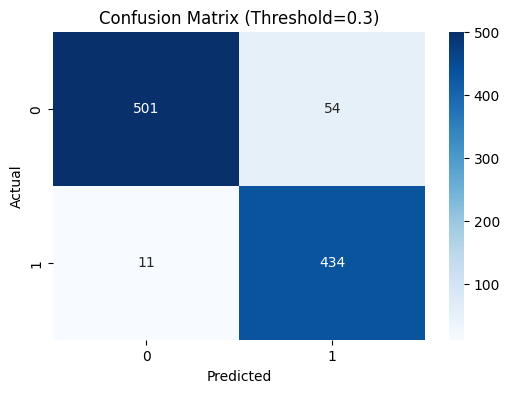

In [229]:
# Get predicted probabilities for the fraud class
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1 (Fraud)

# Apply custom threshold (e.g., 0.3 to catch more frauds)
threshold = 0.3
y_pred = (y_prob > threshold).astype(int)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Threshold={threshold})")
plt.show()


# **📊 Feature Importance**

---



Feature importance is analyzed to identify which attributes contribute most to fraud detection, such as:

Invoice Value

Input Tax Credit

Turnover

Filing Delay

This helps in interpreting the model’s decision-making process.

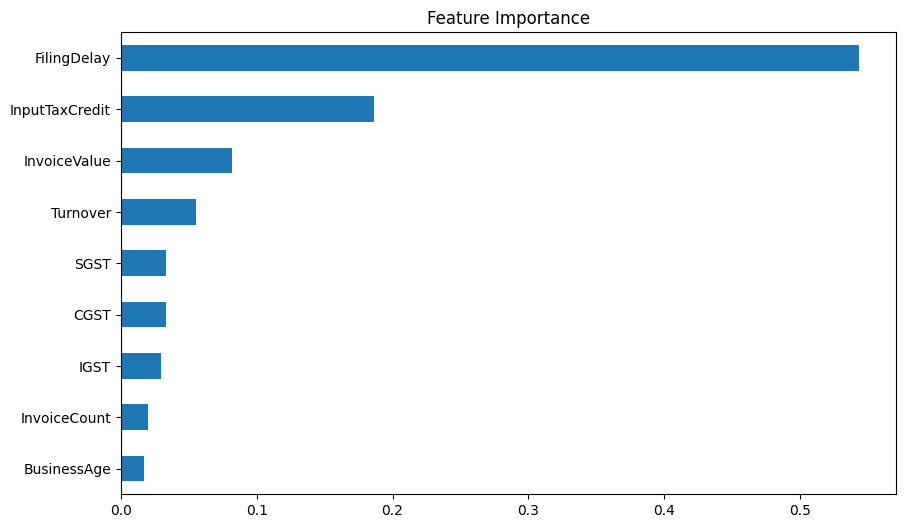

In [230]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", figsize=(10,6))
plt.title("Feature Importance")
plt.show()


# **🧪 Testing the Model**

---



We validate the model by making predictions on new transaction data.
Example: Provide custom inputs such as Invoice Value, ITC, Turnover, and Filing Delay → Model outputs Fraudulent or Normal.

# **🖥️ UI Development**

---



A simple User Interface (UI) was developed for easy entries:

Users can input transaction details

The trained model instantly classifies it as Fraudulent (🚨) or Normal (✅)

This makes the system more practical and user-friendly

In [234]:
# Interactive form (works in Colab)
import ipywidgets as widgets
from IPython.display import display

# Create input boxes
invoice_value = widgets.IntText(description="InvoiceValue:")
igst = widgets.FloatText(description="IGST:")
cgst = widgets.FloatText(description="CGST:")
sgst = widgets.FloatText(description="SGST:")
input_tax_credit = widgets.FloatText(description="InputTaxCredit:")
turnover = widgets.IntText(description="Turnover:")
invoice_count = widgets.IntText(description="InvoiceCount:")
business_age = widgets.IntText(description="BusinessAge:")
filing_delay = widgets.IntText(description="FilingDelay:")

button = widgets.Button(description="Predict")

# Prediction function
def on_button_click(b):
    new_data = pd.DataFrame([{
        'InvoiceValue': invoice_value.value,
        'IGST': igst.value,
        'CGST': cgst.value,
        'SGST': sgst.value,
        'InputTaxCredit': input_tax_credit.value,
        'Turnover': turnover.value,
        'InvoiceCount': invoice_count.value,
        'BusinessAge': business_age.value,
        'FilingDelay': filing_delay.value
    }])

    new_scaled = scaler.transform(new_data)
    prediction = model.predict(new_scaled)[0]

    print("\nResult:", "🚨 Fraudulent Transaction" if prediction == 1 else "✅ Normal Transaction")

button.on_click(on_button_click)

# Display widgets
display(invoice_value, igst, cgst, sgst, input_tax_credit, turnover, invoice_count, business_age, filing_delay, button)


IntText(value=0, description='InvoiceValue:')

FloatText(value=0.0, description='IGST:')

FloatText(value=0.0, description='CGST:')

FloatText(value=0.0, description='SGST:')

FloatText(value=0.0, description='InputTaxCredit:')

IntText(value=0, description='Turnover:')

IntText(value=0, description='InvoiceCount:')

IntText(value=0, description='BusinessAge:')

IntText(value=0, description='FilingDelay:')

Button(description='Predict', style=ButtonStyle())


Result: 🚨 Fraudulent Transaction

Result: ✅ Normal Transaction


# **✅ Conclusion**

---



Built a Random Forest model for GST fraud detection.

Achieved high accuracy in distinguishing fraudulent vs normal transactions.

Identified key features like Invoice Value, Turnover, and Filing Delay.

Developed a basic UI for real-time testing of the model.

Future Scope:

Use advanced models like XGBoost / LightGBM.

Deploy as a Flask/Django API for integration with financial systems.

Train on real-world GST data for production use.




In [232]:
import joblib

# Save model & scaler after training
joblib.dump(model, "gst_fraud_model.pkl")
joblib.dump(scaler, "scaler_.pkl")

print("✅ Model and Scaler saved successfully!")


✅ Model and Scaler saved successfully!
